In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/ccit0915/Desktop/交通部航港局AI智慧專案/進出港船舶合併.xlsx')

In [4]:
import pandas as pd

# 移除「臺灣港」欄位（皆為台中港，無區辨力）
df.drop(columns=['臺灣港'], inplace=True)

# 將進港資料的目的港、目的洲，出港資料的來源港、來源洲設為 NaN（結構性缺失）
df.loc[df['進出'] == 'Inbound', ['目的港', '目的洲']] = pd.NA
df.loc[df['進出'] == 'Outbound', ['來源港', '來源洲']] = pd.NA

# 頻率編碼函數（保留 NaN）
def frequency_encode(series):
    freq = series.value_counts(normalize=True)
    return series.map(freq)

# 對四個欄位進行頻率編碼
for col in ['目的洲', '目的港', '來源洲', '來源港']:
    df[f'{col}_freq'] = frequency_encode(df[col])
df

,目的洲,目的港,來源洲,來源港,艘次,船舶種類,年月,進出,目的洲_freq,目的港_freq,來源洲_freq,來源港_freq
0,<NA>,<NA>,大洋洲,開普福類特瑞港(AUCQP),2,雜貨船,2020/05,Inbound,NaN,NaN,0.038006,0.006182
1,<NA>,<NA>,大洋洲,紐卡斯爾港(AUNTL),7,散裝船,2020/05,Inbound,NaN,NaN,0.038006,0.005792
2,<NA>,<NA>,南美洲,科羅內爾(CLCNL),2,雜貨船,2020/05,Inbound,NaN,NaN,0.006248,0.001302
3,<NA>,<NA>,亞洲,北海港(CNBHY),1,雜貨船,2020/05,Inbound,NaN,NaN,0.925029,0.002408
4,<NA>,<NA>,亞洲,防城港(CNFAN),1,散裝船,2020/05,Inbound,NaN,NaN,0.925029,0.002473
...,...,...,...,...,...,...,...,...,...,...,...,...
30638,亞洲,臺北港(TWTPE),<NA>,<NA>,1,工作船,2025/04,Outbound,0.948092,0.035151,NaN,NaN
30639,亞洲,TWTXGOS,<NA>,<NA>,5,挖泥船,2025/04,Outbound,0.948092,0.033056,NaN,NaN
30640,亞洲,TWTXGOS,<NA>,<NA>,2,受泥船,2025/04,Outbound,0.948092,0.033056,NaN,NaN
30641,亞洲,TWTXGOS,<NA>,<NA>,3,電纜敷設船,2025/04,Outbound,0.948092,0.033056,NaN,NaN


In [5]:
# 將年月轉為 datetime 格式
df['年月'] = pd.to_datetime(df['年月'], format='%Y/%m')

# 找出同年月、船種、進出下，有超過1筆紀錄的情形
dup_check = df.groupby(['年月', '船舶種類', '進出']).size().reset_index(name='count')
dup_check = dup_check[dup_check['count'] > 1]

# 合併回原始表格以觀察詳細紀錄
df_merged = pd.merge(df, dup_check, on=['年月', '船舶種類', '進出'])

# 看幾組範例
sample = df_merged.sort_values(['年月', '船舶種類', '進出']).head(20)
print(sample[['年月', '船舶種類', '進出', '來源洲', '來源港', '目的洲', '目的港', '艘次']])

              年月 船舶種類        進出   來源洲              來源港   目的洲              目的港  \
74    2020-05-01  LNG   Inbound    亞洲     拉斯拉凡港(QARLF)  <NA>             <NA>   
685   2020-05-01  LNG   Inbound    亞洲            QAZZZ  <NA>             <NA>   
694   2020-05-01  LNG   Inbound   大洋洲            AUZZZ  <NA>             <NA>   
717   2020-05-01  LNG   Inbound    歐洲  普里戈羅德諾耶港(RUPGN)  <NA>             <NA>   
720   2020-05-01  LNG   Inbound   北美洲      福廷角港(TTPTF)  <NA>             <NA>   
14969 2020-05-01  LNG  Outbound  <NA>             <NA>    亞洲     拉斯拉凡港(QARLF)   
15944 2020-05-01  LNG  Outbound  <NA>             <NA>   大洋洲            AUZZZ   
15979 2020-05-01  LNG  Outbound  <NA>             <NA>    歐洲  普里戈羅德諾耶港(RUPGN)   
15980 2020-05-01  LNG  Outbound  <NA>             <NA>   北美洲      福廷角港(TTPTF)   
19781 2020-05-01  LNG  Outbound  <NA>             <NA>    亞洲      新加坡港(SGSIN)   
21    2020-05-01  LPG   Inbound    亞洲      古來丹港(MYPGU)  <NA>             <NA>   
72    2020-05-01  LPG   Inbo

In [6]:
group_cols = ['年月', '船舶種類', '進出']
df_monthly = df.groupby(group_cols)['艘次'].sum().reset_index()

In [11]:
df_monthly

,年月,船舶種類,進出,艘次
0,2020-05-01,LNG,Inbound,11
1,2020-05-01,LNG,Outbound,10
2,2020-05-01,LPG,Inbound,6
3,2020-05-01,LPG,Outbound,6
4,2020-05-01,佈管線船,Inbound,1
...,...,...,...,...
3268,2025-04-01,錨船,Outbound,3
3269,2025-04-01,雜貨船,Inbound,76
3270,2025-04-01,雜貨船,Outbound,84
3271,2025-04-01,電纜敷設船,Inbound,10


In [13]:
import pandas as pd

# 確保年月為 datetime 格式
df["年月"] = pd.to_datetime(df["年月"], errors="coerce")

# 定義群組欄位
group_cols = ["年月", "船舶種類", "進出"]

# 港口欄位統一處理：來源港與目的港合併為一欄做統計
df["港口"] = df["來源港"].fillna("") + "_" + df["目的港"].fillna("")

# 計算來源洲 / 目的洲最大頻率
來源洲最大頻率 = df.groupby(group_cols)["來源洲_freq"].max().reset_index(name="來源洲最大頻率")
目的洲最大頻率 = df.groupby(group_cols)["目的洲_freq"].max().reset_index(name="目的洲最大頻率")

# 計算港口數量（來源港與目的港綜合去重）
航線組合數 = df.groupby(group_cols)["港口"].nunique().reset_index(name="航線組合數")

# 計算港口頻率平均與最大值（來源與目的港頻率分開統計，再合併）
來源港_freq統計 = df.groupby(group_cols)["來源港_freq"].agg(["mean", "max"]).reset_index()
來源港_freq統計.columns = group_cols + ["來源港freq_平均", "來源港freq_最大"]

目的港_freq統計 = df.groupby(group_cols)["目的港_freq"].agg(["mean", "max"]).reset_index()
目的港_freq統計.columns = group_cols + ["目的港freq_平均", "目的港freq_最大"]

# 將所有特徵合併回一個總表
df_features = (
    來源洲最大頻率
    .merge(目的洲最大頻率, on=group_cols, how="left")
    .merge(航線組合數, on=group_cols, how="left")
    .merge(來源港_freq統計, on=group_cols, how="left")
    .merge(目的港_freq統計, on=group_cols, how="left")
)

df_monthly = df.groupby(group_cols)["艘次"].sum().reset_index()
df_final = df_monthly.merge(df_features, on=group_cols, how="left")
df_final

,年月,船舶種類,進出,艘次,來源洲最大頻率,目的洲最大頻率,航線組合數,來源港freq_平均,來源港freq_最大,目的港freq_平均,目的港freq_最大
0,2020-05-01,LNG,Inbound,11,0.925029,NaN,5,0.001054,0.003905,NaN,NaN
1,2020-05-01,LNG,Outbound,10,NaN,0.948092,5,NaN,NaN,0.005708,0.023434
2,2020-05-01,LPG,Inbound,6,0.925029,NaN,6,0.006746,0.015163,NaN,NaN
3,2020-05-01,LPG,Outbound,6,NaN,0.948092,6,NaN,NaN,0.005291,0.020881
4,2020-05-01,佈管線船,Inbound,1,0.925029,NaN,1,0.010543,0.010543,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3268,2025-04-01,錨船,Outbound,3,NaN,0.948092,2,NaN,NaN,0.020226,0.033056
3269,2025-04-01,雜貨船,Inbound,76,0.925029,NaN,40,0.010045,0.075296,NaN,NaN
3270,2025-04-01,雜貨船,Outbound,84,NaN,0.948092,44,NaN,NaN,0.007309,0.077895
3271,2025-04-01,電纜敷設船,Inbound,10,0.925029,NaN,6,0.018363,0.035208,NaN,NaN


In [15]:
output_path = "/Users/ccit0915/Desktop/交通部航港局AI智慧專案/航線組合數df.xlsx"
df_final.to_excel(output_path, index=False)

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 假設你的資料已在 df_final 中
df = df_final.copy()

# 將年月轉為 datetime 格式
df["年月"] = pd.to_datetime(df["年月"])

# 補 NaN：來源港與目的港相關欄位（為合理缺失）
freq_cols = ["來源港freq_平均", "來源港freq_最大", "目的港freq_平均", "目的港freq_最大"]
df[freq_cols] = df[freq_cols].fillna(0)

# 補 NaN：來源/目的洲最大頻率欄位
df["來源洲最大頻率"] = df["來源洲最大頻率"].fillna(0)
df["目的洲最大頻率"] = df["目的洲最大頻率"].fillna(0)

# 拆解年月為年與月欄位
df["年"] = df["年月"].dt.year
df["月"] = df["年月"].dt.month

# Label Encoding：船舶種類
le = LabelEncoder()
df["船舶種類_編碼"] = le.fit_transform(df["船舶種類"])


# 特徵與目標欄位
features = [
    "航線組合數",
    "年", "月", "船舶種類_編碼"
]
target = "艘次"

# 切分資料集
train_df = df[df["年月"] < "2024-05-01"]
test_df = df[df["年月"] >= "2024-05-01"]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# 模型訓練
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估指標
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 輸出結果
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 208.6638
MAE: 6.4426
RMSE: 14.4452
R²: 0.9605


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:664: UserWarning: Glyph 33322 (\N{CJK UNIFIED IDEOGRAPH-822A}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:664: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:664: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:664: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  ann.update_bbox_position_size(renderer)
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/tree/_export.py:664: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDE

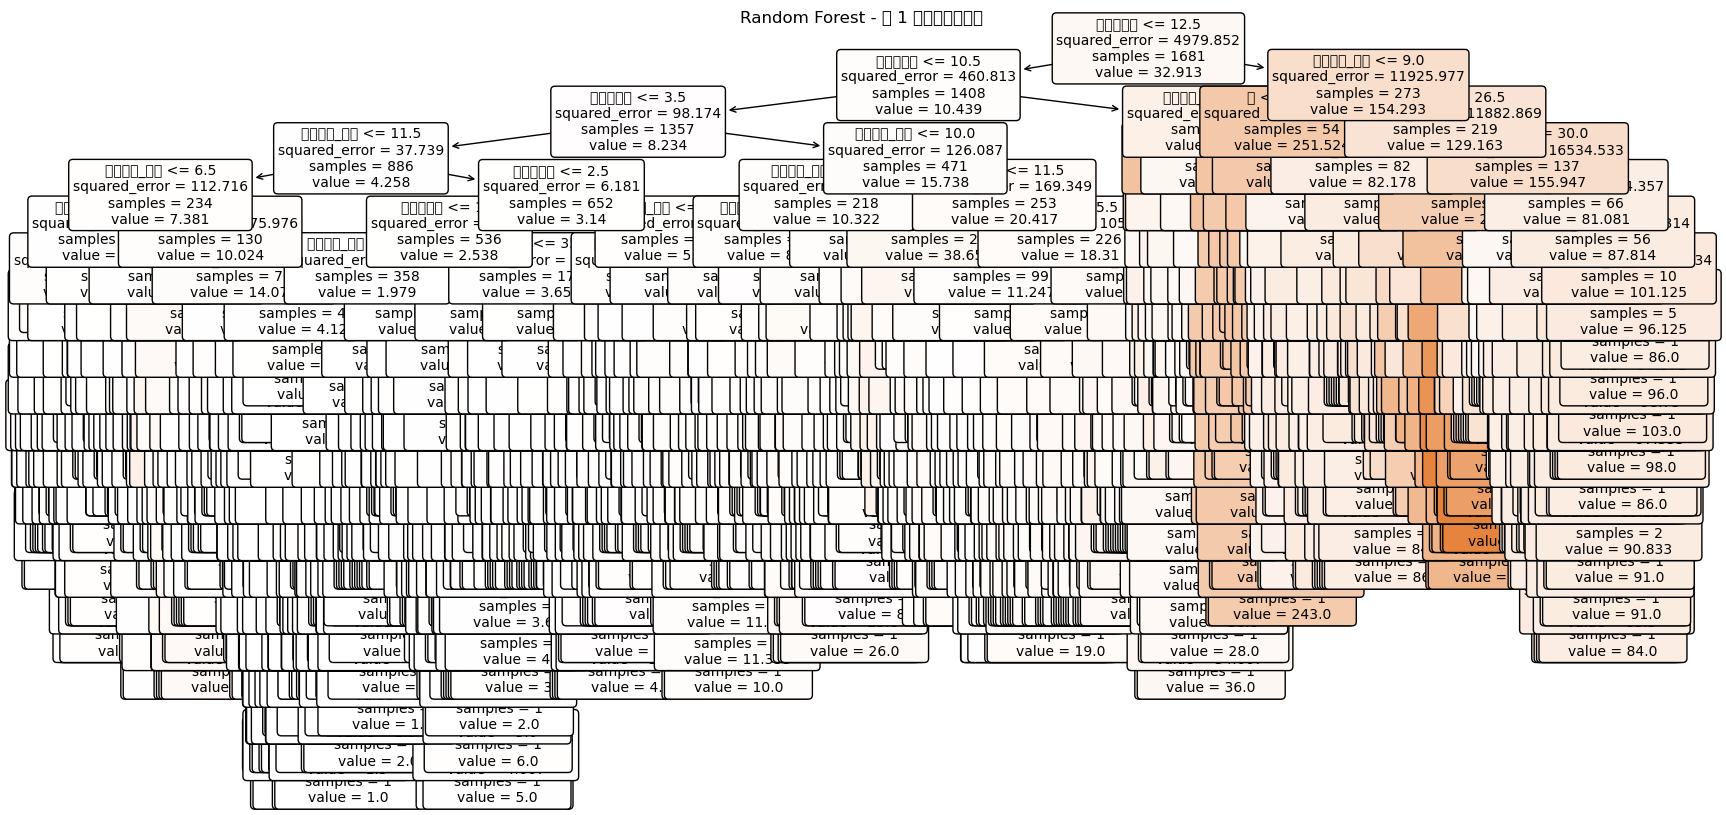

In [21]:
feature_names = X_train.columns.tolist()  # 加上 .tolist() 轉換為 list

plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, rounded=True, fontsize=10)
plt.title("Random Forest - 第 1 棵決策樹視覺化")
plt.savefig("decision_tree_plot.png", dpi=300)
plt.show()

In [26]:
import joblib

# 存模型
joblib.dump(model, "rf_model_port_vessel_count.pkl")

# 存成一個字典
joblib.dump({
    "model": model,
    "label_encoder": le
}, "/Users/ccit0915/Desktop/交通部航港局AI智慧專案/智慧港口艘次預測模型/rf_model_with_encoder.pkl")

['/Users/ccit0915/Desktop/交通部航港局AI智慧專案/智慧港口艘次預測模型/rf_model_with_encoder.pkl']

In [28]:
import pandas as pd
import joblib
import ipywidgets as widgets
from IPython.display import display

# 載入模型與 LabelEncoder
bundle = joblib.load("/Users/ccit0915/Desktop/交通部航港局AI智慧專案/智慧港口艘次預測模型/rf_model_with_encoder.pkl")
model = bundle["model"]
le = bundle["label_encoder"]

# 自動建立映射
ship_type_to_code = dict(zip(le.classes_, le.transform(le.classes_)))
code_to_ship_type = {v: k for k, v in ship_type_to_code.items()}

# 選項產生
ship_types = list(ship_type_to_code.keys())
years = [2020, 2021, 2022, 2023, 2024, 2025]
months = list(range(1, 13))
port_counts = list(range(1, 100))

# UI 元件
port_count_widget = widgets.Dropdown(options=port_counts, description='航線組合數:')
year_widget = widgets.Dropdown(options=years, description='年:')
month_widget = widgets.Dropdown(options=months, description='月:')
ship_type_widget = widgets.Dropdown(options=ship_types, description='船舶種類:')
button = widgets.Button(description="預測艘次")
output = widgets.Output()

# 預測按鈕事件
def on_button_clicked(b):
    with output:
        output.clear_output()
        ship_type_encoded = ship_type_to_code[ship_type_widget.value]
        input_df = pd.DataFrame({
            "航線組合數": [port_count_widget.value],
            "年": [year_widget.value],
            "月": [month_widget.value],
            "船舶種類_編碼": [ship_type_encoded]
        })
        pred = model.predict(input_df)[0]
        print(f"🚢 預測艘次：{pred:.2f}")

button.on_click(on_button_clicked)

# 顯示介面
display(port_count_widget, year_widget, month_widget, ship_type_widget, button, output)

Dropdown(description='航線組合數:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

Dropdown(description='年:', options=(2020, 2021, 2022, 2023, 2024, 2025), value=2020)

Dropdown(description='月:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

Dropdown(description='船舶種類:', options=('LNG', 'LPG', '佈管線船', '全貨櫃船', '冷凍船', '化學液體船', '半貨櫃船', '受泥船', '多用途工作', '…

Button(description='預測艘次', style=ButtonStyle())

Output()

In [54]:
print(type(model))  # 預期 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
print(type(le))     # 預期 <class 'sklearn.preprocessing._label.LabelEncoder'>

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [112]:
# 假設這是你整理好的高 SHAP 值編碼
high_shap_codes = [4, 25, 28, 45]

# 查詢對應的船型名稱
for code in high_shap_codes:
    print(f"ship_type_code {code}: {code_to_ship_type.get(code, '未知')}")

ship_type_code 4: 冷凍船
ship_type_code 25: 散裝船
ship_type_code 28: 未知
ship_type_code 45: 雜貨船


In [83]:
# 特徵重要性
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# 輸出特徵重要性
print("特徵重要性排序：")
print(feature_importance)

特徵重要性排序：
港口數量       0.595221
船舶種類_編碼    0.257718
月          0.100186
年          0.046186
進出_編碼      0.000689
dtype: float64


In [30]:
# 改欄位名稱（先複製df）
df_english = df.rename(columns={
    "航線組合數": "route_combination_count",
    "船舶種類_編碼": "ship_type_code",
    "月": "month",
    "年": "year"
})

# 訓練與測試資料也改對應欄位
features = ["route_combination_count", "year", "month", "ship_type_code"]

X_train = train_df.rename(columns={
    "航線組合數": "route_combination_count",
    "船舶種類_編碼": "ship_type_code",
    "月": "month",
    "年": "year"
})[features]
X_test = test_df.rename(columns={
    "航線組合數": "route_combination_count",
    "船舶種類_編碼": "ship_type_code",
    "月": "month",
    "年": "year"
})[features]

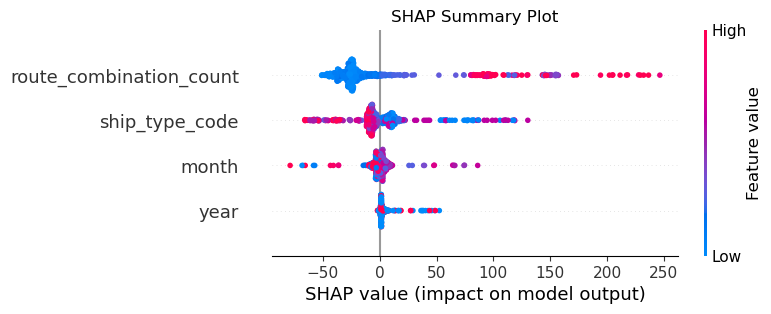

In [32]:
import shap
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'DejaVu Sans'  # 這行加在這裡

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.show()

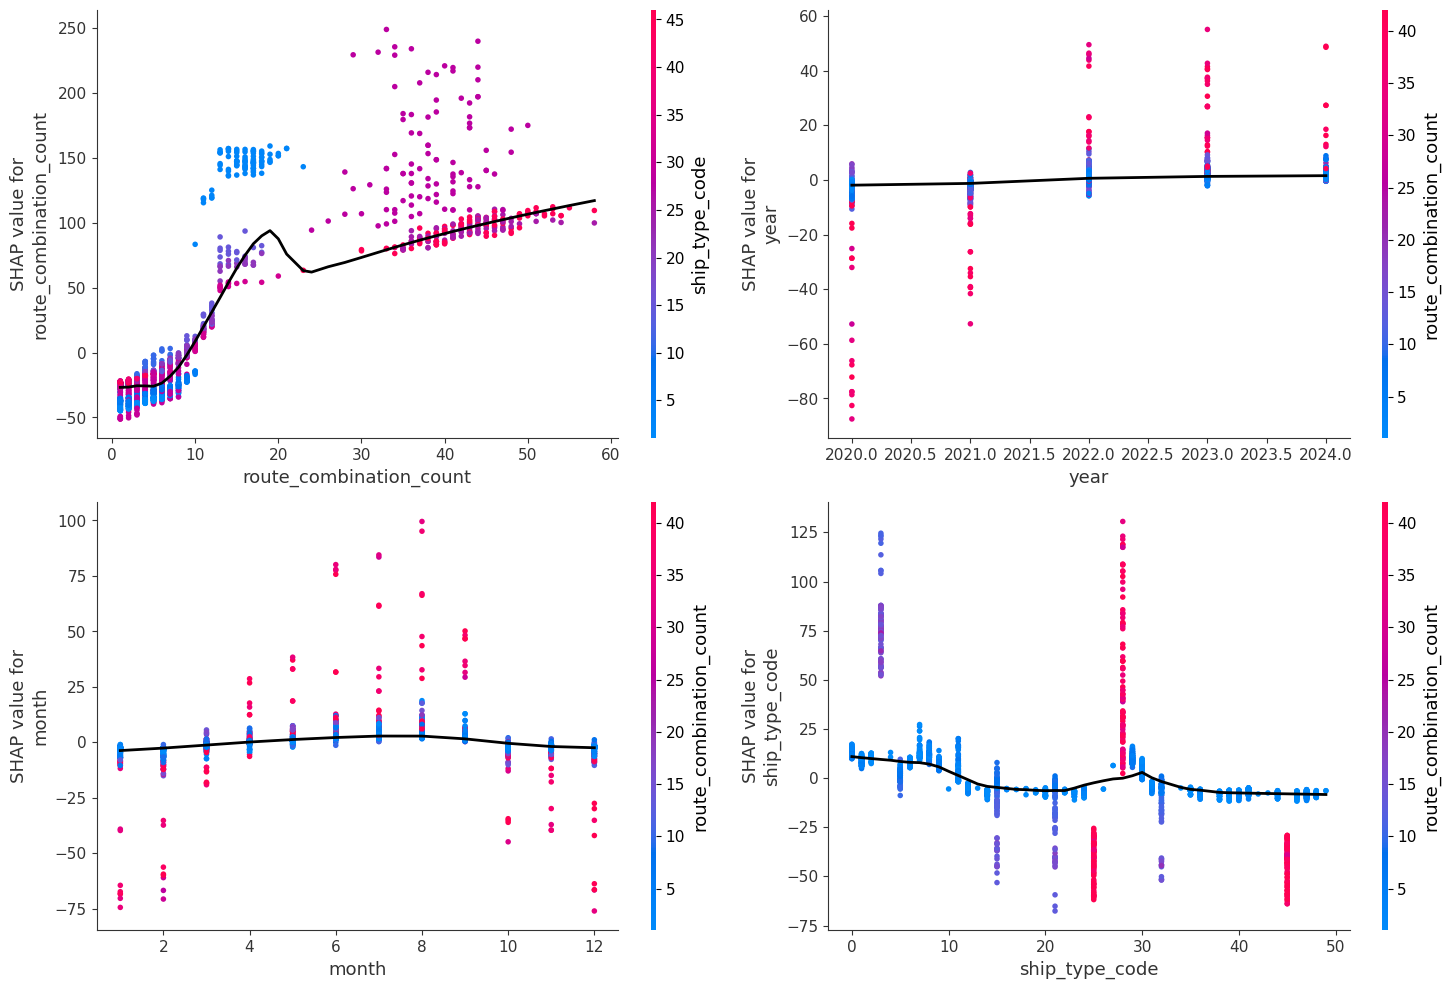

In [34]:
import shap
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

#  RF 模型是 single output (回歸或分類二元)
explainer = shap.TreeExplainer(model)  # 你的 RF 模型
shap_values = explainer.shap_values(X_train)  

# RF 回傳 shap_values 通常是 ndarray shape=(n_samples, n_features) 或 list (多分類時)
if isinstance(shap_values, list):
    # 假設二分類，取第1個類別的SHAP值
    shap_values = shap_values[1]  

# 確保是 ndarray
shap_values = np.array(shap_values)

features = ['route_combination_count', 'year', 'month', 'ship_type_code']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, feature in enumerate(features):
    ax = axes[i // 2, i % 2]
    shap.dependence_plot(feature, shap_values, X_train, show=False, ax=ax)
    
    feat_idx = X_train.columns.get_loc(feature)
    shap_feat = shap_values[:, feat_idx]
    feat_values = X_train[feature].values
    
    loess_smoothed = lowess(shap_feat, feat_values, frac=0.3)
    ax.plot(loess_smoothed[:, 0], loess_smoothed[:, 1], color='k', linewidth=2)

plt.tight_layout()
plt.show()

In [35]:
print(X_test.columns.tolist())

['route_combination_count', 'year', 'month', 'ship_type_code']


In [130]:
X_train

,港口數量,年,月,船舶種類_編碼
0,5,2020,5,0
1,5,2020,5,0
2,6,2020,5,1
3,6,2020,5,1
4,1,2020,5,2
...,...,...,...,...
2613,40,2024,4,45
2614,2,2024,4,46
2615,2,2024,4,46
2616,1,2024,4,47
